In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import joblib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

/Users/naman/.pyenv/versions/3.6.8/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
df = pd.read_csv("data/one_hot_data.csv")

In [4]:
df.head()

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0,802906,6,487,12198,2,30,6,5,1,...,0,0,0,0,0,0,0,0,1,0
1,1,28830,8,900,2812,2,10,8,7,0,...,0,0,0,0,0,0,0,0,1,0
2,2,94947,21,363,8973,2,10,5,5,0,...,0,0,0,0,0,0,0,0,1,0
3,3,590882,22,418,10694,2,10,6,5,0,...,0,0,0,0,0,0,0,0,1,0
4,4,201944,11,131,1488,3,30,8,9,1,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df2 = pd.read_csv("data/train_labels.csv")

In [6]:
df2.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [7]:
test = df['building_id']
test2 = df2['building_id']
for i in range(len(test)):
    if test[i] != test2[i]:
        print(i)

In [8]:
df = df.drop(['Unnamed: 0', 'building_id'], axis=1)

In [9]:
df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
columns = df.columns

In [11]:
X = df.to_numpy()

In [12]:
Y = df2['damage_grade'].to_numpy()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
d_train = lgb.Dataset(X_train, label=y_train-1)
params = {'objective': 'multiclass',
          'num_class': 3,
          'metric': 'multi_logloss',
          'boosting_type': 'gbdt', # dart
          'max_bin': 4095,
          'learning_rate': 0.001,
          'num_threads': 6,
          'num_iterations': 5000,
          'num_leaves': 1200
         }

In [13]:
lite = lgb.train(params, d_train)

/Users/naman/.pyenv/versions/3.6.8/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [14]:
y_pred = lite.predict(X_test)

In [15]:
y_preds = np.argmax(y_pred, axis=1)
y_preds += 1

In [16]:
y_train_pred = lite.predict(X_train)
y_train_preds = np.argmax(y_train_pred, axis=1)
y_train_preds += 1

In [17]:
print(f1_score(y_train, y_train_preds, average='micro'))
print(f1_score(y_test, y_preds, average='micro'))

0.8194311204911742
0.7465129218549145


In [20]:
joblib.dump(lite, "decision_models/lite-7.model")
# 1 gdbt - 100, 2 dart - 100, 3 dart-leaves-500-bin-1023, 3 (72.26) gdbt-leaves-500-bin-1023, 4 (73.33) gdbt-leaves-500-bin-4095, 
# 5 (73.87) gdbt-leaves-1000-bin-4095, 6 (73.48) dart-leaves-1000-bin-4095, 7 (74.65) gbdt-leaves-1200-bin-4095

['decision_models/lite-7.model']

In [64]:
def get_leaves_vals(x):
    accuracies = [None] * len(x)
    accuracies2 = [None] * len(x)
    for i in range(len(x)):
        leaves = lgb.LGBMClassifier(n_estimators=1000, n_jobs=6, num_leaves=x[i], objective='multiclass', 
                                           boosting_type='gbdt')
        leaves.fit(X_train, y_train)
        accuracies[i] = f1_score(y_test, leaves.predict(X_test), average='micro')
        leaves = lgb.LGBMClassifier(n_estimators=1000, n_jobs=6, num_leaves=x[i], objective='multiclass', 
                                           boosting_type='dart')
        leaves.fit(X_train, y_train)
        accuracies2[i] = f1_score(y_test, leaves.predict(X_test), average='micro')
    return accuracies, accuracies2
        
xs3000 = [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
ys3000, ysdart = get_leaves_vals(xs3000)

Text(0.5, 1.0, 'Lite Gradient Boosting Ensemble Validation accuracy for Number of Leaves')

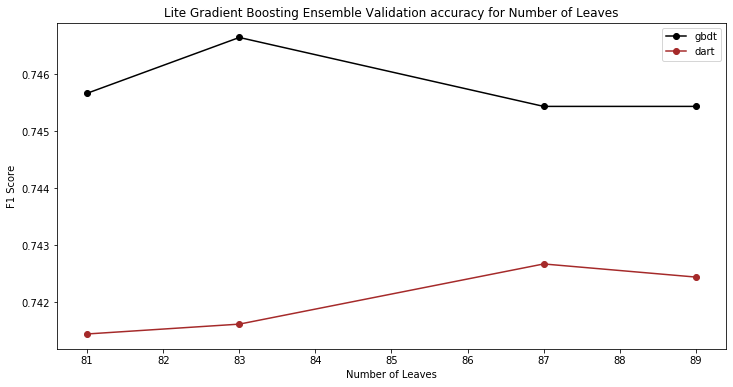

In [67]:
morexs = [81, 83, 87, 89]
moreys3000, moreysdart = get_leaves_vals(morexs)
plt.figure(figsize=(12,6))
plt.plot(morexs, moreys3000, '-ok', label='gbdt', color='black');
plt.plot(morexs, moreysdart, '-ok', label='dart', color='brown');
plt.legend()
plt.xlabel('Number of Leaves')
plt.ylabel('F1 Score')
plt.title('Lite Gradient Boosting Ensemble Validation accuracy for Number of Leaves')
# plt.savefig('source_images/num_leaves_analysis.png')

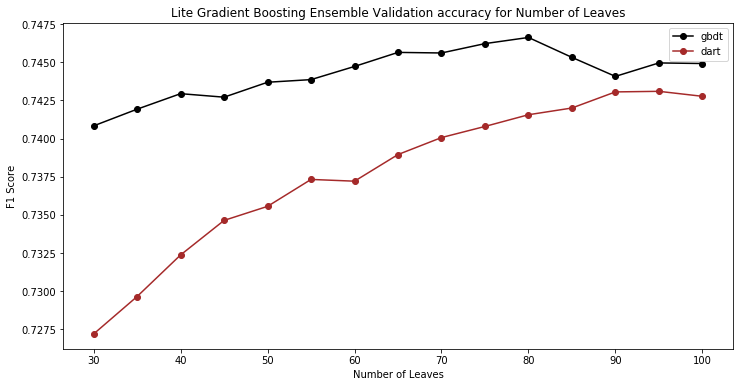

In [65]:
plt.figure(figsize=(12,6))
plt.plot(xs3000, ys3000, '-ok', label='gbdt', color='black');
plt.plot(xs3000, ysdart, '-ok', label='dart', color='brown');
plt.legend()
plt.xlabel('Number of Leaves')
plt.ylabel('F1 Score')
plt.title('Lite Gradient Boosting Ensemble Validation accuracy for Number of Leaves')
plt.savefig('source_images/num_leaves_analysis.png')

In [ ]:
def getcounts(x):
    accuracies = [None] * len(x)
    accuracies2 = [None] * len(x)
    for i in range(len(x)):
        leaves = lgb.LGBMClassifier(n_estimators=x[i], n_jobs=6, num_leaves=70, objective='multiclass', 
                                           boosting_type='gbdt')
        leaves.fit(X_train, y_train)
        accuracies[i] = f1_score(y_test, leaves.predict(X_test), average='micro')
        leaves = lgb.LGBMClassifier(n_estimators=x[i], n_jobs=6, num_leaves=70, objective='multiclass', 
                                           boosting_type='dart')
        leaves.fit(X_train, y_train)
        accuracies2[i] = f1_score(y_test, leaves.predict(X_test), average='micro')
    return accuracies
        
xs3000 = [100, 1000, 2000, 3000, 4000]
ys3000, ysdart = get_leaves_vals(xs3000)
plt.figure(figsize=(12,6))
plt.plot(xs3000, ys3000, '-ok', label='gbdt', color='black');
plt.plot(xs3000, ysdart, '-ok', label='dart', color='brown');
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.title('Lite Gradient Boosting Ensemble Validation accuracy for Number of Estimators')
plt.savefig('source_images/num_estimator_analysis.png')

In [ ]:
# lite_ensemble = lgb.LGBMClassifier(n_estimators=3000, n_jobs=6, num_leaves=1000)
lite_ensemble = lgb.LGBMClassifier(n_estimators=4000, n_jobs=6, num_leaves=65, objective='multiclass', 
                                   boosting_type='dart')

In [53]:
lite_ensemble.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=4000, n_jobs=6, num_leaves=65,
               objective='multiclass', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [54]:
print(f1_score(y_train, lite_ensemble.predict(X_train), average='micro'))
print(f1_score(y_test, lite_ensemble.predict(X_test), average='micro'))

0.8380036454336147
0.746110013238426


In [33]:
joblib.dump(lite_ensemble, "decision_models/lite-ensemble-13.model")
#  1 (74.75) ensemble-leaves-31-n_estimators-3000, 2 (74.3) ensemble-leaves-100-n_estimators-3000, 3 (74.82) ensemble-leaves-32-n_estimators-3000,
# 4 (74.70) ensemble-leaves-33-n_estimators-3000, 5 (74.79) ensemble-leaves-34-n_estimators-3000, 6 (74.68) ensemble-leaves-35-n_estimators-3000,
# 7 (74.70) ensemble-leaves-30-n_estimators-3000, 8 (74.67) ensemble-leaves-32-n_estimators-5000, 9 (74.68) ensemble-leaves-32-n_estimators-4000,
# 10 (74.42) dart-ensemble-leaves-32-n_estimators-5000, 11 (74.70) dart-ensemble-leaves-60-n_estimators-4000, 
# 12 (74.61) gbdt-ensemble-leaves-60-n_estimators-4000, 13 (74.55) dart-ensemble-leaves-50-n_estimators-4000,
# 14 (74.53) dart-ensemble-leaves-40-n_estimators-4000,

['decision_models/lite-ensemble-11.model']

In [34]:
litef_ensemble = lgb.LGBMClassifier(n_estimators=3000, n_jobs=6, num_leaves=32, objective='multiclass')
litef_ensemble.fit(X, Y)

KeyboardInterrupt: 

In [102]:
test = pd.read_csv('data/test_values.csv', index_col='building_id')
test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
99355,6,141,11987,2,25,13,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
890251,22,19,10044,2,5,4,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
745817,26,39,633,1,0,19,3,t,r,x,...,0,0,1,0,0,0,0,0,0,0
421793,17,289,7970,3,15,8,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


In [103]:
def oneHot(df, column_name):
    one_hot = pd.get_dummies(df[column_name])
    df = df.drop(column_name,axis = 1)
    df = df.join(one_hot)
    for letter in one_hot.columns:
        df[column_name + "_" + letter] = df[letter]
        df.drop(letter, axis=1, inplace=True)
    return df

categorical_vars = ["foundation_type", "land_surface_condition", "roof_type", "ground_floor_type", "other_floor_type", "position", "plan_configuration", "legal_ownership_status"]
for var in categorical_vars:
    test = oneHot(test, var)
    

In [106]:
print(len(test.columns), len(columns))

for i in range (len(test.columns)):

    if test.columns[i] != columns[i]:
        print(test.columns[i], columns[i])

68 68


In [105]:
test = test.reindex(columns=columns)

In [107]:
test1 = test.to_numpy()

In [108]:
test_pred = litef_ensemble.predict(test1)

In [109]:
submission_format = pd.read_csv('data/submission_format.csv', index_col='building_id')

In [110]:
my_submission = pd.DataFrame(data=test_pred,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [111]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [112]:
my_submission.to_csv('data/submission2.csv')

In [35]:
param_leaves = {
 'num_leaves':[32, 50, 90]
}
gsearch = GridSearchCV(estimator = lgb.LGBMClassifier(n_estimators=3000, n_jobs=6), 
 param_grid = param_leaves, scoring='f1_micro', n_jobs=6, cv=5)
gsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=3000,
                                      n_jobs=6, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=6, param_grid={'num_leaves': [32, 50, 90]},
             pre_dispatch='2*n_jobs', refit=Tr

In [36]:
print(f1_score(y_train, gsearch.predict(X_train), average='micro'))
print(f1_score(y_test, gsearch.predict(X_test), average='micro'))

0.8355237912509593
0.7482204869438422


In [39]:
gsearch.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=3000, n_jobs=6, num_leaves=32, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
joblib.dump(gsearch, "decision_models/gsearch-1.model")
# 'num_leaves':[32, 50, 90], n_estimators=3000
# in the future, will use fewer estimators for figuring out optimal parameter, then run full training